<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria no-lineal utilizando Regresores logísticos en cadena:
1. El problema XOR
2. Regresores logísticos en cadena

<hr>
# 1. El problema XOR

<img src='res/shallow_nn/xor_problem.png'>

 # 1. Regresor Logístico

In [1]:
import numpy as np

In [3]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [4]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [5]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [6]:
def cost(logloss):
    return np.mean(logloss)

<hr>
# Trabajemos
3. Realicemos descenso del gradiente por cada regresor logístico.
4. Creemos un solo regresor no lineal combinando el grafo de cómputo en cadena visto en clase y los W y b actualizados para cada regresor.

### - Creemos los 3 datasets (X1, Y1), (X2, Y2) y (X3, Y3) según trabajamos en clase.

In [8]:
X1 = np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y1 = np.array([[0, 1, 0, 0]])
print("X1: ",X1, 'Y1: ', Y1)

X2 = np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y2 = np.array([[0, 0, 1, 0]])
print("X2: ",X2, 'Y2: ', Y2)

X3 = np.array([[0,0],[0,1],[1,0]]).T
Y3 = np.array([[0, 1, 1]])
print("X3: ",X3, 'Y3: ', Y3)

('X1: ', array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'Y1: ', array([[0, 1, 0, 0]]))
('X2: ', array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'Y2: ', array([[0, 0, 1, 0]]))
('X3: ', array([[0, 0, 1],
       [0, 1, 0]]), 'Y3: ', array([[0, 1, 1]]))


__Resultado esperado:__<br>
('X1: ', array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'Y1: ', array([[0, 1, 1, 1]]))
       <br>
('X2: ', array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'Y2: ', array([[1, 1, 1, 0]]))
       <br>
('X3: ', array([[0, 1, 1, 1],
       [1, 1, 1, 0]]), 'Y3: ', array([[0, 1, 1, 0]]))

### - Inicialicemos los pesos W1, W2, W3 de forma aleatoria (__np.random.rand(shape)__) y los bias b en zero.

In [9]:
def initialize_parameters():
    seed = 2
    np.random.seed(seed)

    W1 = np.random.rand(2,1)
    b1 = 0

    W2 = np.random.rand(2,1)
    b2 = 0

    W3 = np.random.rand(2,1)
    b3 = 0

    return (W1, b1, W2, b2, W3, b3)

(W1,b1,W2,b2,W3,b3) = initialize_parameters()

print('W1: ', W1, 'b1: ',b1)
print('W2: ', W2, 'b2: ',b2)
print('W3: ', W3, 'b3: ',b3)

('W1: ', array([[0.4359949 ],
       [0.02592623]]), 'b1: ', 0)
('W2: ', array([[0.54966248],
       [0.43532239]]), 'b2: ', 0)
('W3: ', array([[0.4203678 ],
       [0.33033482]]), 'b3: ', 0)


__Resultado esperado:__
<br>
('W1: ', array([[-0.41675785],
       [-0.05626683]]), 'b1: ', 0)
       <br>
('W2: ', array([[-2.1361961 ],
       [ 1.64027081]]), 'b2: ', 0)
       <br>
('W3: ', array([[-1.79343559],
       [-0.84174737]]), 'b3: ', 0)


<hr>
### - Apliquemos descenso del gradiente a cada regresor logístico por separado

In [10]:
def backward_propagation(A, X, Y):
    m = X.shape[1]
    
    dz = A - Y
    dW = np.dot(X, dz.T) / m
    db = np.sum(dz) / m
    
    return (dW, db)

In [11]:
learning_rate = 0.6

(W1,b1,W2,b2,W3,b3) = initialize_parameters()

num_epochs = 10000

for i in range(num_epochs): 
    ## Forward Propagation -- a = sigmoid(z = linear_activation)
    Z1 = linear_activation(W1,b1,X1)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2,b2,X2)
    A2 = sigmoid(Z2)
    
    Z3 = linear_activation(W3, b3, X3)
    A3 = sigmoid(Z3)
    
    #Backward Propagation -- backward_propagation(A, X, Y)
    (dW1, db1) = backward_propagation(A1,X1, Y1)
    (dW2, db2) = backward_propagation(A2,X2, Y2)
    (dW3, db3) = backward_propagation(A3,X3, Y3)
    
    #Weight and bias Updates W = W - learning * dW  ---- b = b - learning_rate * db
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    
    #Cost estimation
    J1 = cost(loss(Y1,A1))
    J2 = cost(loss(Y2,A2))
    J3 = cost(loss(Y3,A3))
    
    
    if(i%1000 == 0):
        print("costo regresor 1 -- iteracion ", i, ": ", J1)
        print("costo regresor 2 -- iteracion ", i, ": ", J2)
        print("costo regresor 3 -- iteracion ", i, ": ", J2)

print("W1 actualizado: ",W1, "b1 actualizado: ", b1)
print("W2 actualizado: ",W2, "b2 actualizado: ", b2)
print("W3 actualizado: ",W3, "b3 actualizado: ", b3)

('costo regresor 1 -- iteracion ', 0, ': ', 0.8146702066569141)
('costo regresor 2 -- iteracion ', 0, ': ', 0.8463454966474182)
('costo regresor 3 -- iteracion ', 0, ': ', 0.8463454966474182)
('costo regresor 1 -- iteracion ', 1000, ': ', 0.015454840478135709)
('costo regresor 2 -- iteracion ', 1000, ': ', 0.01539339446680846)
('costo regresor 3 -- iteracion ', 1000, ': ', 0.01539339446680846)
('costo regresor 1 -- iteracion ', 2000, ': ', 0.0076686654534003)
('costo regresor 2 -- iteracion ', 2000, ': ', 0.00765334773476592)
('costo regresor 3 -- iteracion ', 2000, ': ', 0.00765334773476592)
('costo regresor 1 -- iteracion ', 3000, ': ', 0.005089136156996592)
('costo regresor 2 -- iteracion ', 3000, ': ', 0.005082362030615173)
('costo regresor 3 -- iteracion ', 3000, ': ', 0.005082362030615173)
('costo regresor 1 -- iteracion ', 4000, ': ', 0.0038057728395748296)
('costo regresor 2 -- iteracion ', 4000, ': ', 0.0038019765658749904)
('costo regresor 3 -- iteracion ', 4000, ': ', 0.0038

### - verifiquemos las predicciones por cada regresor logístico ya entrenado.

In [19]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [25]:
predict(W3, b3, np.array([0,0]))

array([0.])

In [137]:
Y_hat1 = predict(W1,b1,X1)
Y_hat2 = predict(W2,b2,X2)
Y_hat3 = predict(W3,b3,X3)
print("predicciones regresor 1: ",np.round(Y_hat1),"--- Clases originales: ", Y1)
print("predicciones regresor 2: ",np.round(Y_hat2),"--- Clases originales: ", Y2)
print("predicciones regresor 3: ",np.round(Y_hat3),"--- Clases originales: ", Y3)

('predicciones regresor 1: ', array([[ 0.,  1.,  1.,  1.]]), '--- Clases originales: ', array([[0, 1, 1, 1]]))
('predicciones regresor 2: ', array([[ 1.,  1.,  1.,  0.]]), '--- Clases originales: ', array([[1, 1, 1, 0]]))
('predicciones regresor 3: ', array([[ 0.,  1.,  1.,  0.]]), '--- Clases originales: ', array([[0, 1, 1, 0]]))


__Resultado esperado:__
<br>
('predicciones regresor 1: ', array([[ 0.,  1.,  1.,  1.]]), '--- Clases originales: ', array([[0, 1, 1, 1]]))
<br>
('predicciones regresor 2: ', array([[ 1.,  1.,  1.,  0.]]), '--- Clases originales: ', array([[1, 1, 1, 0]]))
<br>
('predicciones regresor 3: ', array([[ 0.,  1.,  1.,  0.]]), '--- Clases originales: ', array([[0, 1, 1, 0]]))


<hr>
### - Agrupemos los tres regresores en capas
<img src='res/shallow_nn/compute_graph_3.png' width=800>

In [31]:
np.concatenate??

In [34]:
def predict_multilayer(W1,b1,W2,b2,W3,b3,X):
    Z1 = linear_activation(W1,b1,X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2, b2, X)
    A2 = sigmoid(Z2)
    
    #A1 and A2 are inputs for z3. Use np.concatenate((A1,A2),axis=0) to create X3
    X3 = np.concatenate((A1, A2))
    Z3 = linear_activation(W3, b3, X3)
    A3 = sigmoid(Z3)
    
    return np.round(A3)

A3 = predict_multilayer(W1,b1,W2,b2,W3,b3,X1)
print(X1)
print(A3)

[[0 0 1 1]
 [0 1 0 1]]
[[0. 1. 1. 0.]]


__Resultado esperado:__[[ 0.  1.  1.  0.]]

# Apliquemos nuestro regresor multicapa al problema XOR
----- Solo ejecutar celdas -----

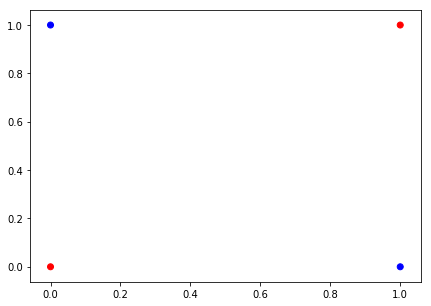

In [35]:
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])

color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

In [36]:
def visualize_lr(W1, b1, W2, b2, W3, b3, X, Y):
    X = X.T
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict_multilayer(W1,b1,W2,b2,W3,b3,np.c_[xx.ravel(), yy.ravel()].T)
    print(Z)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

[[0. 0. 0. ... 0. 0. 0.]]


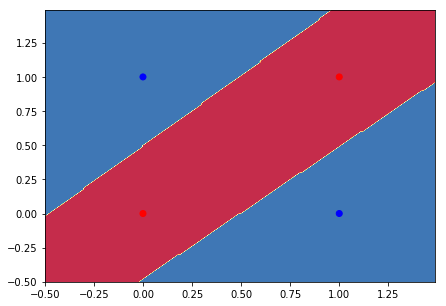

In [37]:
visualize_lr(W1, b1, W2, b2, W3, b3, X, Y)

In [38]:
print(W1,b1)
print(W2, b2)

(array([[-12.52977958],
       [ 12.12315063]]), -6.205650990688937)
(array([[ 12.12396314],
       [-12.53055003]]), -6.206069244673045)


In [40]:
z1 = linear_activation(W1, b1, X1)
z2 = linear_activation(W2, b2, X2)

print("X: ",X)
print(z1, z2)

('X: ', array([[0, 0, 1, 1],
       [0, 1, 0, 1]]))
(array([[ -6.20565099,   5.91749964, -18.73543057,  -6.61227994]]), array([[ -6.20606924, -18.73661927,   5.9178939 ,  -6.61265613]]))


In [60]:
W_1 = np.squeeze(np.array([W1,W2]))
b_1 = np.array([[b1,b2]]).T
print(W_1)
print(b_1)

[[-12.52977958  12.12315063]
 [ 12.12396314 -12.53055003]]
[[-6.20565099]
 [-6.20606924]]


In [63]:
Z = np.dot(W_1,X)+b_1

In [64]:
print(Z)

[[ -6.20565099   5.91749964 -18.73543057  -6.61227994]
 [ -6.20606924 -18.73661927   5.9178939   -6.61265613]]
